<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load</a></span></li></ul></div>

# Description

Aim: just vizualize the results of the code. 

# Load

In [1]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

from result_analysis import plot_ri

from result_analysis import print_final_flows

from result_analysis import plot_cost_all_path

import pandas as pd

In [25]:
path='Data/2Nodes/outputs/test_dualityGap/'

In [26]:
for f in os.listdir(path):
    print(f)
    f=f.split(".")[0]
    print(f.split("_"))

output_L_10000_ni_10000_no_20.pkl
['output', 'L', '10000', 'ni', '10000', 'no', '20']


In [27]:
os.listdir(path)

['output_L_10000_ni_10000_no_20.pkl']

In [28]:
filename=os.listdir(path)[0]
with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res = pickle.load(f)

In [33]:
len(G_FW)

21

In [37]:
np.linalg.norm(balance,axis=1)

array([1.41421356, 0.        , 7.98735463, 0.02588349, 0.02588349,
       0.02588349, 0.02588349, 0.02588349, 0.02588349, 0.02588349,
       0.02588349, 0.02588349, 0.02588349, 0.02588349, 0.02588349,
       0.02588349, 0.02588349, 0.02588349, 0.02588349, 0.02588349,
       0.02588349])

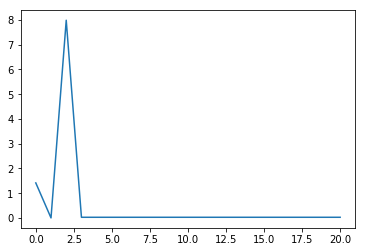

In [40]:
plt.plot(np.linalg.norm(balance,axis=1))

(-0.5, 0.5)

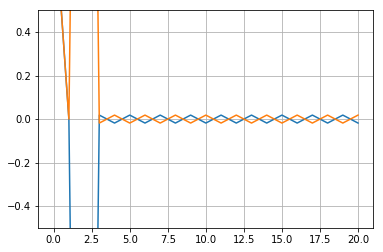

In [47]:
plt.figure()
plt.plot(balance[:,0])
plt.plot(balance[:,1])
plt.grid(True)
plt.ylim([-.5,.5])

In [35]:
np.sum(n_inner)

21810

In [32]:
OD

{('1', '1_p'): 10, ('2', '2_p'): 10}

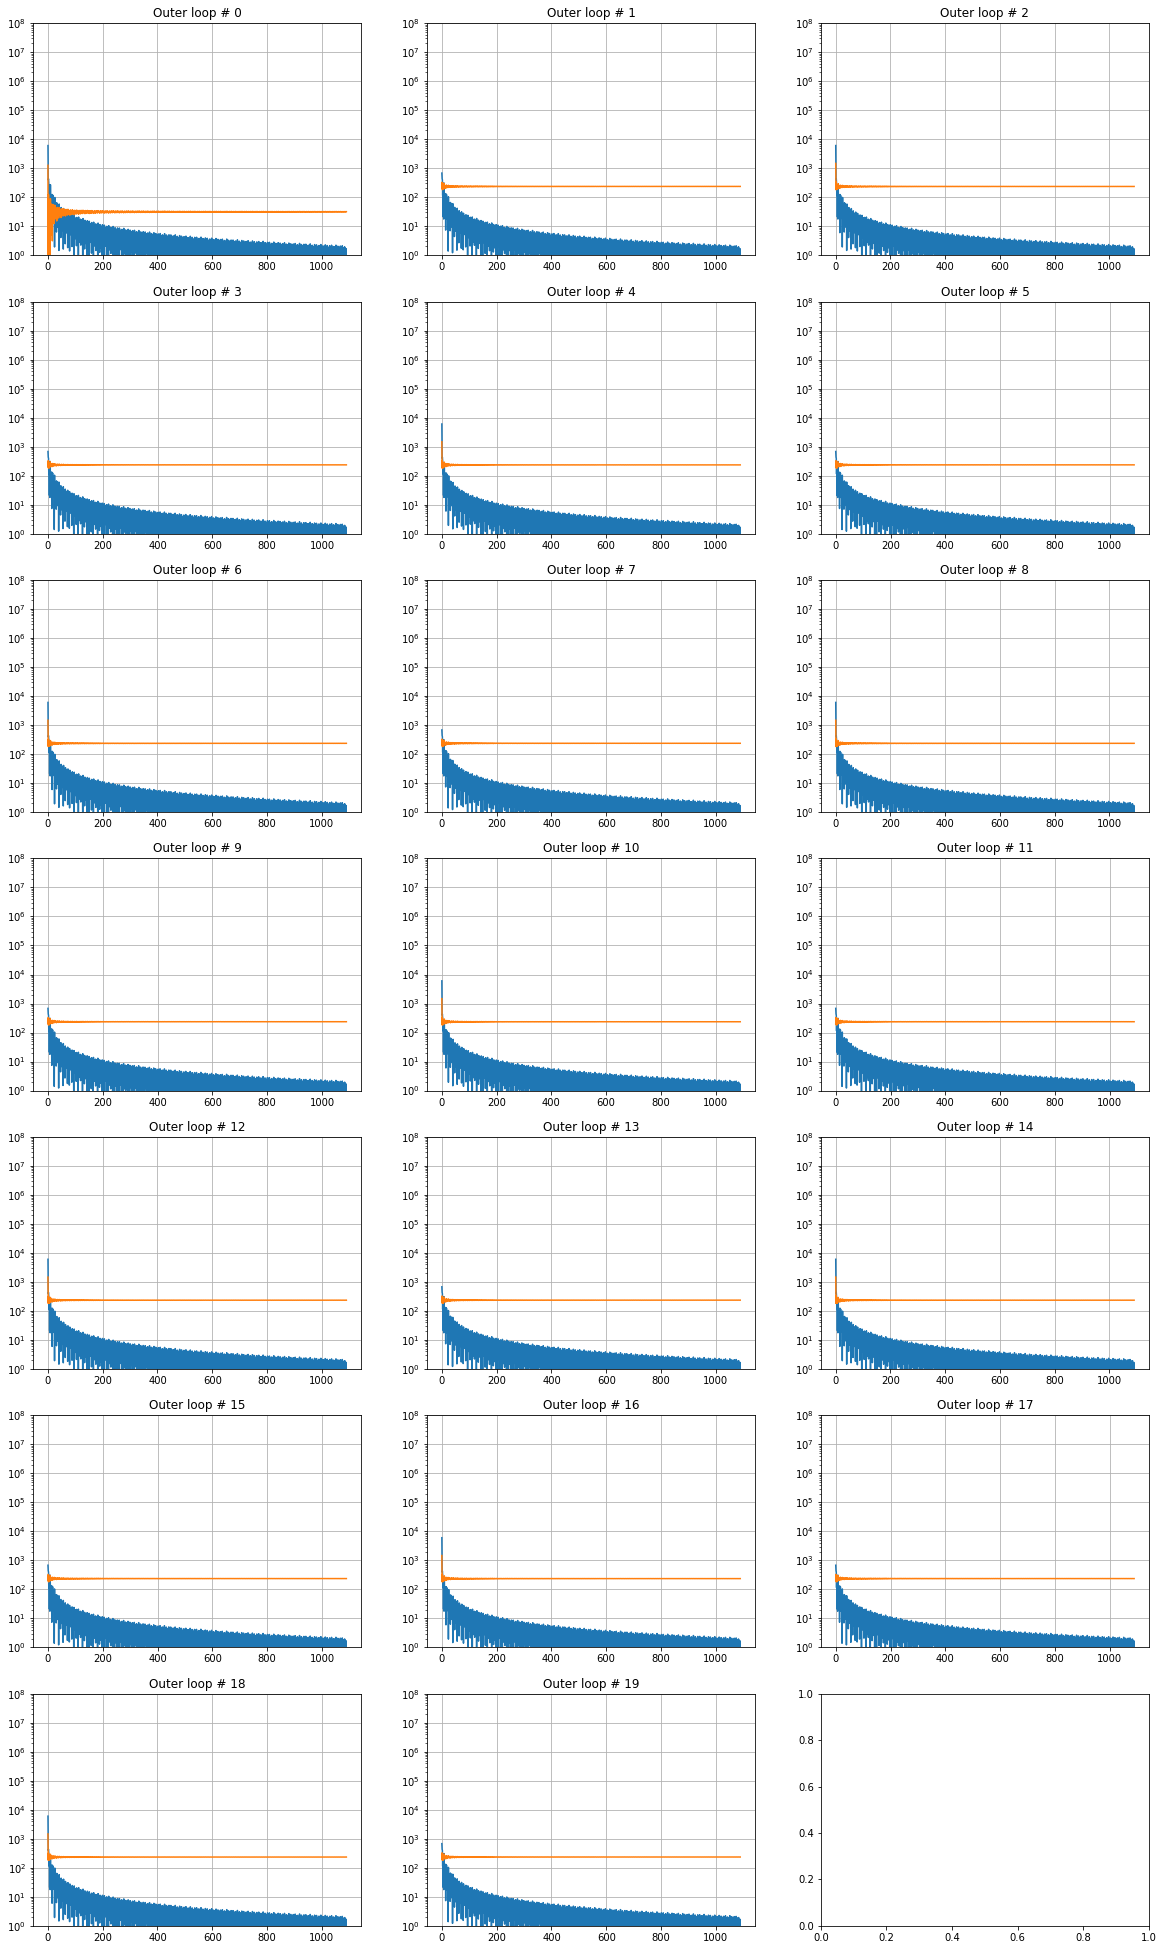

In [31]:
nplots=len(opt_res)
ncols=3
nrows=int(np.ceil(nplots/ncols))
_, axes = plt.subplots(nrows, ncols, figsize=(20, 5*nrows))
for n in range(nplots):
    i = int(np.floor(n / ncols))
    j=n % ncols
    axes[i,j].plot(opt_res[n]['dual_gap'])
    axes[i,j].set_title('Outer loop # '+ str(n))
    axes[i,j].set_yscale('log')
#     axes[i,j].set_xscale('log')
    axes[i,j].grid(True)
    axes[i,j].plot(opt_res[n]['obj'])
    axes[i,j].set_ylim([10**0,10**8])

We note that the duality gap is way way way high ahah
We also see the same oscillatory behavior as before... While I don't think that should be the case as we are using FW... 
I think there is an issue in my implementation. 

In [ ]:
axes=plt.subplots

In [8]:
opt_res[0].keys()


dict_keys(['a_k', 'obj', 'dual_gap'])

In [47]:
n_outer

26

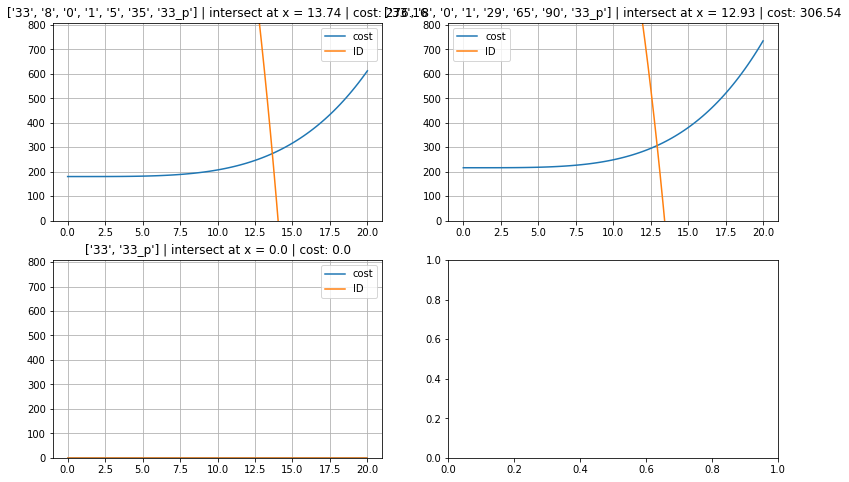

In [5]:
plot_cost_all_path(G_FW[0], OD, '33', '33_p')

In [20]:
final_=pd.DataFrame(columns=['o','d','f_m','f_r', 'cost'])

for e in G_FW[-1].edges():
    data=np.array([e[0],e[1], np.around(G_FW[-1][e[0]][e[1]]['f_m'],2), np.around(G_FW[-1][e[0]][e[1]]['f_r'],2), int(G_FW[-1][e[0]][e[1]]['cost'])])
    l=pd.DataFrame(columns=final_.columns,data=data.reshape(1,5))
    final_=final_.append(l,ignore_index=True)

In [15]:
path=['33','8','0','1','5','35','33_p']

edges_path=[]

for i in range(len(path)-1):
    edges_path.append((path[i],path[i+1]))

In [31]:
cost_tot=0
for e in edges_path:
    cost_crt=G_FW[-1][e[0]][e[1]]['cost']
    print(e[0],e[1],np.around(cost_crt,2), np.around(G_FW[-1][e[0]][e[1]]['f_m'],2)+ np.around(G_FW[-1][e[0]][e[1]]['f_r'],2))
    cost_tot+=cost_crt

33 8 493.71 30.35
8 0 388.9 28.44
0 1 1288.28 39.03
1 5 379.09 28.23
5 35 45.14 11.41
35 33_p 1255.27 1.41


In [30]:
cost_tot


3850.392110161443

In [29]:
G_FW[-1].nodes['0_p']['pot']

3849.0

In [27]:
cost_tot

3850.392110161443

In [21]:
final_

,o,d,f_m,f_r,cost
0,0,1,17.59,21.44,1288
1,0,2,19.99,0.52,131
2,0,3,20.0,0.47,130
3,0,7,29.77,0.1,466
4,0,8,16.22,12.35,395
5,0,24,0.0,0.0,36
6,0,25,0.0,0.0,36
7,0,69,17.22,0.0,83
8,0,R,0.0,10.04,414931
9,0,0_p,0.0,0.0,3849


In [9]:
final_[final_['d']=='33_p']

,o,d,f_m,f_r
103,33,33_p,18.59,0.0
109,35,33_p,1.41,0.0
306,90,33_p,0.0,0.0


In [10]:
balance.shape

(26, 101)

In [14]:
np.max(np.abs(balance[-1,:]))

0.08479503316577919

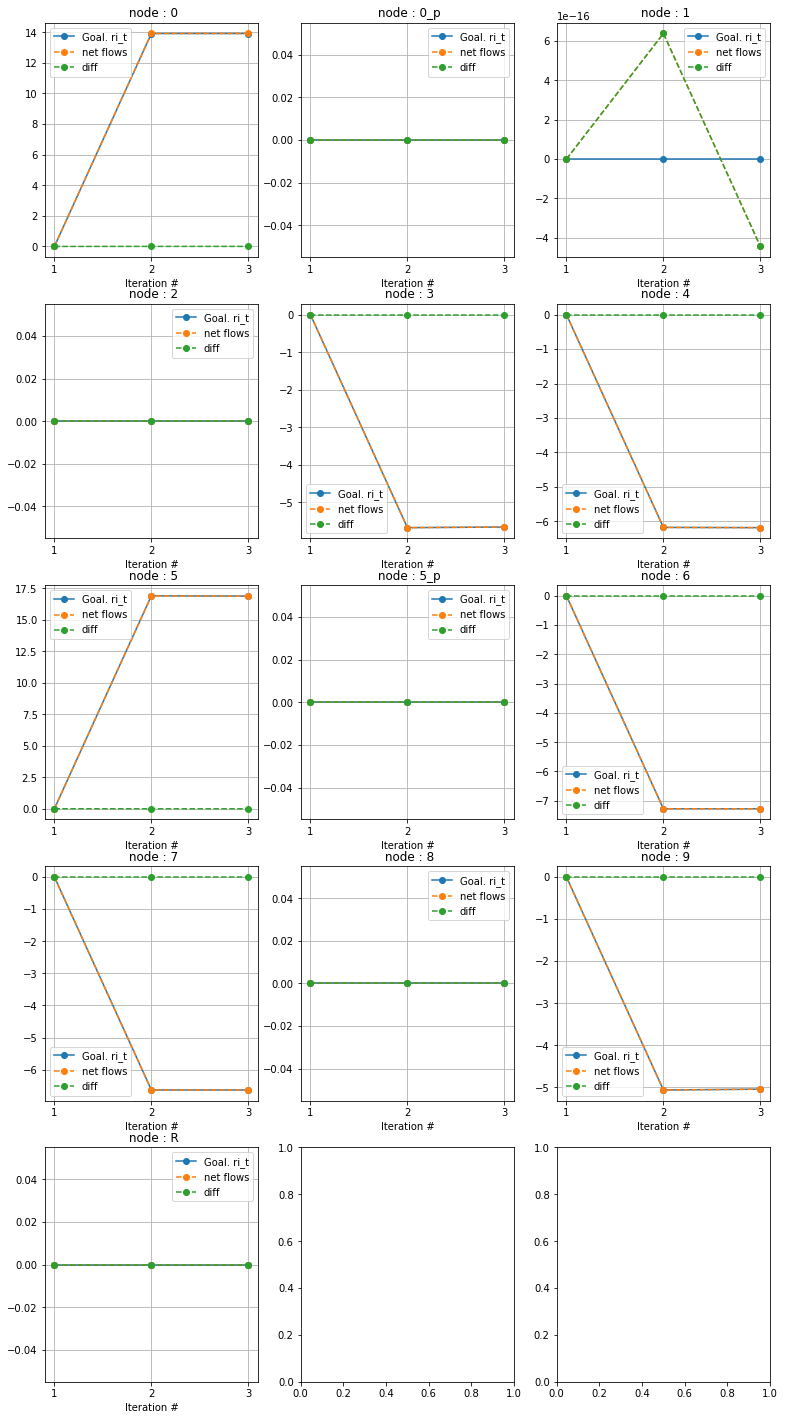

In [166]:
plot_ri(ri_FW, G_FW, compare = True)